## LightGBM
XGBoost와 함께 각광받고 있음. XGBoost는 뛰어난 부스팅 알고리즘이지만, 여전히 시간이 하이퍼 파라미터 튜닝으로 인한 긴 시간 소요 단점. **Light**GBM는 이보다는 학습 시간이 빠르며 메모리 사용량도 적음. 또한, 카테고리형 피처의 자동 변환과 최적 분할을 수행할 수 있음. 둘의 예측 성능은 크게 차이가 없음. 단점은, 적은 데이터셋(10,000 이하)에 적용하게 될 경우, 과적합 문제가 발생할 수 있다는 것. 

LightGBM은 일반 GBM 계열의 트리 분할 방법(균형 트리 분할 Level Wise)과 다르게 리프 중심 트리 분할(Leaf Wise) 방식을 사용. 

Level Wise : 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 트리의 깊이 최소화. 오버피팅에 더 강한 구조. 대신, 균형을 맞추기 위한 시간 소요.

Leaf Wise : 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리 생성. 이렇게 생성된 규칙 트리는 학습을 반복할수록 균형 트리 분할 방식보다 예측 오류 손실을 최소화. <Remark> max delta loss : 학습 중 손실(loss)이 한 학습 단계에서 다음 단계로 변할 때, 그 변화량의 최대치를 나타내는 개념

파이썬용 래퍼 LightGBM, 사이킷런 래퍼 LightGBM (LGBMClassifier / LGBMRegression)

In [2]:
pip install lightgbm==3.3.2

  Using cached lightgbm-3.3.2.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [99 lines of output]
      INFO:root:running bdist_wheel
      /private/var/folders/_k/vj01ydns1g7_x8fmtnd7yq8m0000gn/T/pip-install-d1ts1l8q/lightgbm_432067aec08444ad9485bb8a9f48cc00/setup.py:220: SetuptoolsDeprecationWarning: setup.py install is deprecated.
      !!
      
              ********************************************************************************
              Please avoid running ``setup.py`` directly.
              Instead, use pypa/build, pypa/installer or other
              standards-based tools.
      
              See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
              ********************************************************************************
      
      !!
        install.initialize_options(self)
      I

In [3]:
import lightgbm 
from lightgbm import LGBMClassifier

## LightGBM 하이퍼 파리미터

**주요 파라미터**
* num_iteratiors : default 100. 반복수행하려는 트리의 개수 지정. (GBM, XGBoost n_estimators)
* learning_rate : default 0.1. 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값. (GBM, XGBoost learning rate)
* max_depth : default -1. 0보다 작은 값을 지정하면 깊이에 제한이 없다는 뜻. level wise 보다 깊이가 상대적으로 더 깊음
* min_data_in_leaf : default 20. 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수. (결정 트리 min_samples_leaf) (LightGBMClassifier min_child_samples)
* num_leaves : default 31. 하나의 트리가 가질 수 있는 최대 리프 개수.
* boosting : default gbdt 부스팅의 트리를 생성하는 알고리즘 기술. rf
* bagging_fraction : default 1.0. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율. (GBM, XGBClassifier,LightGBMClassifier subsample)
* feature_fraction : default 1.0. 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율 (GBM max_features) (XGBClassifier,LightGBMClassifier colsample_bytree)
* lambda_l2 : default 0.0. L2 regulation 제어를 위한 값 (XGBClassifier,LightGBMClassifier reg_lambda) 
* lambda_l1 : default 0.0. L1 regulation 제어를 위한 값 (XGBClassifier,LightGBMClassifier reg_alpha)

**Learning Task 파라미터**
* objective : 최솟값을 가져야하는 손실함수를 정의. (XGBoost objective) 

<Remark> L2, L1 regulation 머신러닝 및 딥러닝 모델에서 과적합(overfitting)을 방지하고 모델의 일반화 성능을 향상시키기 위해 사용되는 정규화 기법.

## 하이퍼 파리미터 튜닝 방안
numleaves의 개수를 중심으로 min_child_samples(min_data_in_leaf),max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안

learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 튜닝 방안

이 밖에도 과적합을 제어하기 위해서 reg_lambda, reg_alpha와 같은 regularization을 적용하거나 학습 데이터에 사용할 피처의 개수나 데이터 샘플링 레코드 개수를 줄이기 위해 colsample_bytree, subsample 파라미터를 적용하는 방안도 있음

## 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파리미터 비교
사이킷런 래퍼 LightGBM 클래스와 사이킷런 래퍼 XGBoost 클래스는 많은 하이퍼 파라미터가 똑같음.

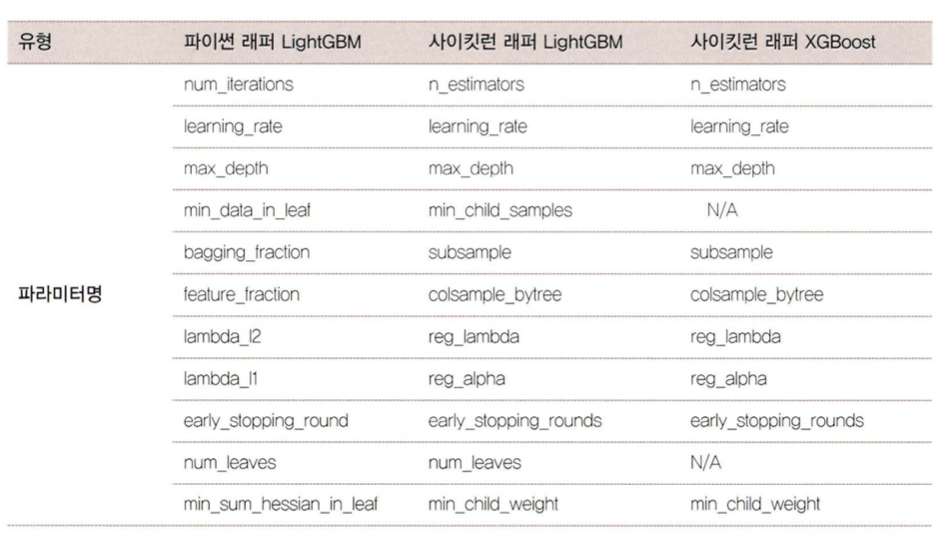

## LightGBM 적용

In [4]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)

cancer_df['target'] = dataset.target

X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X_features,y_label,test_size = 0.2, random_state = 156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size = 0.1, random_state = 156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators = 400, learning_rate = 0.05)


## Remark : early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 반드시 평가용 데이터 세트 지정과 eval_metric을 함께 설정. 
evals = [(X_tr,y_tr),(X_val,y_val)]

from lightgbm import early_stopping, log_evaluation
lgbm_wrapper.fit(X_tr, y_tr, eval_metric="logloss", eval_set=evals, callbacks=[early_stopping(stopping_rounds=50), log_evaluation(period=1)])

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 251, number of negative: 158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4092
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.613692 -> initscore=0.462858
[LightGBM] [Info] Start training from score 0.462858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1:0.9677, AUC:0.9877


피처 중요도를 시각화할 수 있는 내장 API 제공.
plot_importance()

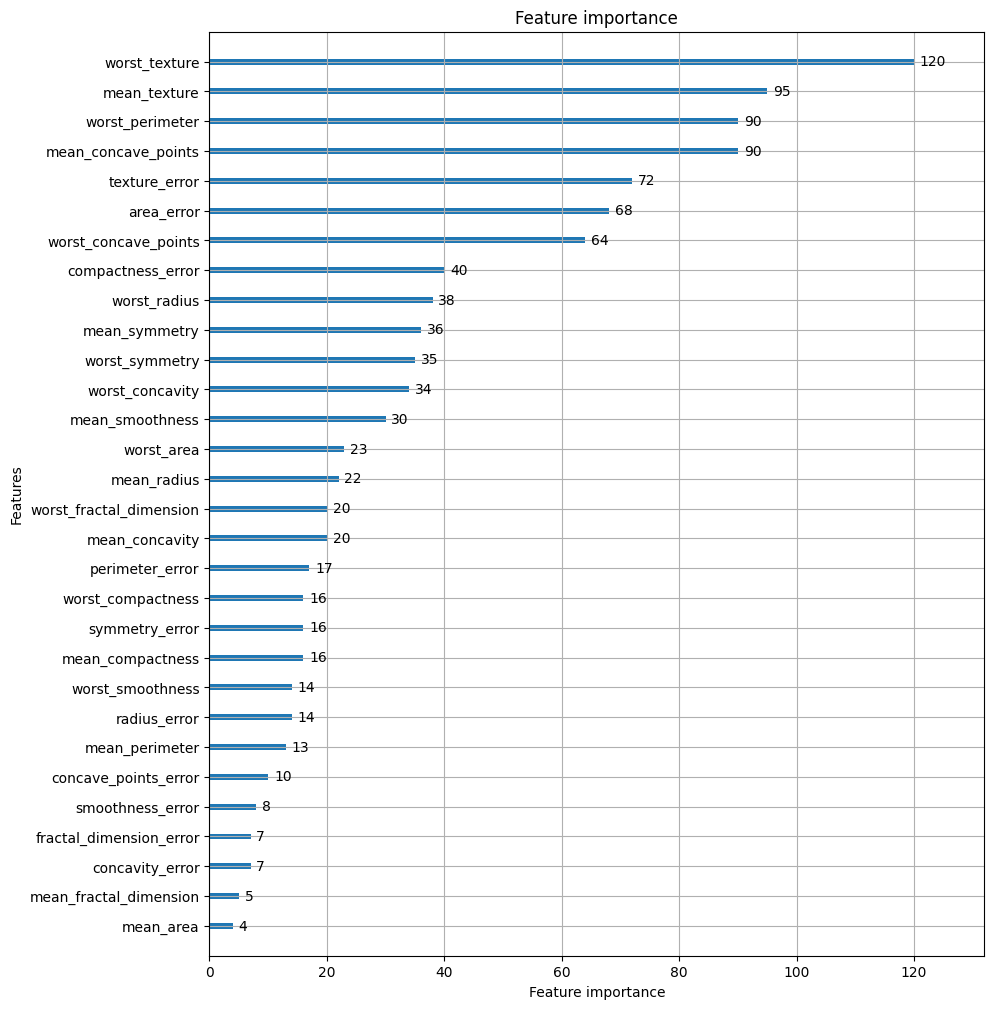

In [6]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize = (10,12))
plot_importance(lgbm_wrapper,ax=ax)
plt.show()

## 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝
지금까지 하이퍼 파라미터 튜닝을 위해서 GridSearch를 활용하였는데 이는 튜닝 파라미터의 개수가 많아질수록 최적화 수행 시간이 오래 걸린다는 단점이 있음. 

XGBoost나 LightGBM는 성능이 매우 뛰어난 알고리즘이지만, 하이퍼 파리미터 개수가 다른 알고리즘에 비해 많음. -> 베이지안 최적화

베이지안 최적화는 목적 함수 식을 제대로 알 수 없는 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식. 

베이지안 확률에 기반을 두고 있는 최적화 기법. 베이지안 확률이 새로운 사건의 관측이나 새로운 샘플 데이터를 기반으로 사후 확률을 개선해 나가듯이 베이지안 최적화는 새로운 데이터를 받았을 때 최적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수 모델을 만들어냄. 

베이지안 최적화를 구성하는 두 가지 요소. 대체모델(Surrogate Model), 획득함수(Acquisition Function). 대체 모델은 획득 함수로부터 최적 함수를 예측할 수 있는 입력값을 추천 받은 뒤 이를 기반으로 최적 함수 모델을 개선해 나가며, 획득 함수는 개선된 대체 모델을 기반으로 최적 입력값을 계산.

Step 1: 최초에는 랜덤하게 하이퍼 파라미터들을 샘플링하고 성능 결과를 관측.

Step 2: 관측된 값을 기반으로 대체 모델은 최적 함수를 추정.

Step 3: 추정된 최적 함수를 기반으로 휙득 함수는 다음으로 관측할 하이퍼 파라미터 값을 계산.

Step 4: 획득 함수로부터 전달된 하이퍼 파라미터를 수행하여 관측된 값을 기반으로 대체 모델은 갱신되어 다시 최적 함수를 예측 추정.

이를 반복하여 모델을 개선시킴.

## HyperOpt 사용하기

베이지안 최적화를 머신러닝 모델의 하이퍼 파라미터 튜닝에 적용할 수 있게 제공하는 여러 파이썬 패키지들이 있는데, 대표적으로 HyperOpt, Bayesian Optimization, Optuna 등.

HyperOpt 활용 로직

첫째는 입력 변수명과 입력값의 검색 공간(Search Space) 설정.

둘째는 목적 함수(Objective Function)의 설정.

마지막으로 목적 함수의 반환 **최솟값**을 가지는 최적 입력값을 유추하는 것.

In [7]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [8]:
# 1. 입력 변수명과 입력값의 검색 공간(Search Space) 설정
from hyperopt import hp

# hp 모듈은 입력값의 검색 공간을 다양 하게 설정할 수 있도록 여러 가지 함수를 제공. hp.quniform()
search_space = {'x' : hp.quniform('x',-10,10,1),
                'y' : hp.quniform('y',-15,15,1)
}

입력값 검색 공간을 제공하는 대표적인 함수들
* hp.quniform(label,low,high,q) : label로 지정된 입력값 변수 검색 공간을 최솟값 low에서 최댓값 high까지 q의 간격을 가지고 설정
* hp.uniform(lable,low,high) : 최솟값 low에서 최댓값 high까지 정규 분포 형태의 검색 공간 설정
* hp.randint(label,upper) : 0부터 최댓값 upper까지 random한 정숫값으로 검색 공간 설정
* hp.loguniform(label,low,high) : exp(uniform(low, high))값을 반환하며, 반환 값의 log 변환 된 값은 정규 분포 형태를 가지는 검색 공간 설정
* hp.choics(label,options) : 검색 값이 문자열 또는 문자열과 숫자값이 섞여 있을 경우 설정. Options는 리스트나 튜플 형태로 제공되며 hp.choice('tree_criterion', ['gini', 'entropy'])과 같이 설정하면 입력 변수 tree_criterion의 값을 'gini'와 'entropy'로 설정하여 입력

In [9]:
# 2. 목적함수 생성
from hyperopt import STATUS_OK


def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y # 목적함수의 반환값

    return retval

# 목적함수의 반환값은 숫자형 단일값 이외에도 딕셔너리 형태로 반환 가능. {'loss': retval, 'status':STATUS_OK} 와 같이 loss와 status 키 값을 설정 해서 반환

3. 목적함수의 반환 최솟값을 가지는 최적 입력값 유추

HyperOpt는 이러한 기능을 수행할 수 있도록 fmin(objective, space, algo, max_evals, trials) 함수를 제공. 

fmin( ) 함수의 주요 인자

* fn: 위에서 생성한 objective_func 와 같은 목적 함수.
* space: 위에서 생성한 search_space와 같은 검색 공간 딕셔너리.
* algo: 베이지안 최적화 적용 알고리즘. 기본적으로 tpe.suggest이며 이는 HyperOpt의 기본 최적화 알고리즘인 TPE(Tree of Parzen Estimator)를 의미.
* max_evals: 최적 입력값을 찾기 위한 입력값 시도 횟수.
* trials: 최적 입력값을 찾기 위해 시도한 입력값 및 해당 입력값의 목적 함수 반환값 결과를 저장하는 데 사용. Trials 클래스를 객체로 생성한 변수명을 입력.
* rstate: fmin()을 수행할 때마다 동일한 결괏값을 가질 수 있도록 설정하는 랜덤 시드(seed) 값. 넘파이의 random Generator를 생성하는 random.default_rng( ) 함수 인자로 seed값을 입력하는 방식



In [10]:
from hyperopt import fmin,tpe, Trials
import numpy as np

trial_val = Trials()

best_01 = fmin(fn = objective_func,space = search_space,algo = tpe.suggest, max_evals = 5, trials = trial_val, 
               rstate = np.random.default_rng(seed=0))

print('best',best_01)

100%|█████████████████████| 5/5 [00:00<00:00, 1166.32trial/s, best loss: -224.0]
best {'x': -4.0, 'y': 12.0}


In [11]:
trial_val = Trials()
best_02 = fmin(fn=objective_func,space = search_space, algo = tpe.suggest, max_evals = 20, trials = trial_val,
              rstate = np.random.default_rng(seed=0))
print('best',best_02)

# 베이지안 최적화 방식으로 상대적으로 최적 값을 찾는 시간을 많이 줄여 줄 수 있다는 것은 알 수 있음. (GridSearch 보다)

100%|███████████████████| 20/20 [00:00<00:00, 2368.86trial/s, best loss: -296.0]
best {'x': 2.0, 'y': 15.0}


Trials 객체의 중요 속성으로는 results, vals있음. 함수의 수행 시마다 최적화되는 경과를 볼 수 있는 함수 반환값과 입력 변숫값들의 정보를 제공해줌.

results : 파이썬 리스트 형태이며 리스트 내 개별 원소는 {'loss':함수 반환값,'status':반환 상태} 와 같은 딕셔너리 형태를 가지고 있음

vals : 딕셔너리 형태로 값을 가짐. 함수 수행시마다 입력되는 입력 변숫값들을 {'입력 변수명': 개별 수행 시마다 입력된 값의 리스트}와 같은 형태를 가지고 있음. 

In [12]:
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [13]:
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [14]:
import pandas as pd

losses = [loss_dict['loss'] for loss_dict in trial_val.results]
# trial_val.results의 각 dictionary에서 'loss' 키에 해당하는 값들을 loss 이름에 저장.

result_df = pd.DataFrame({'x':trial_val.vals['x'],'y':trial_val.vals['y'],'losses':losses})
result_df

x     y  losses
0   -6.0   5.0   -64.0
1   -4.0  10.0  -184.0
2    4.0  -2.0    56.0
3   -4.0  12.0  -224.0
4    9.0   1.0    61.0
5    2.0  15.0  -296.0
6   10.0   7.0   -40.0
7   -9.0 -10.0   281.0
8   -8.0   0.0    64.0
9   -0.0  -5.0   100.0
10  -0.0  -3.0    60.0
11   1.0   2.0   -39.0
12   9.0   4.0     1.0
13   6.0  10.0  -164.0
14   9.0   3.0    21.0
15   2.0   3.0   -56.0
16  -2.0 -14.0   284.0
17  -4.0  -8.0   176.0
18   7.0  11.0  -171.0
19  -0.0  -0.0     0.0

## HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)

X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train, test_size = 0.1, random_state = 156)

In [16]:
from hyperopt import hp
xgb_search_space = {'max_depth' : hp.quniform('max_depth',5,20,1),
                    'min_child_weight' : hp.quniform('min_child_weight',1,2,1),
                    'learning_rate' : hp.uniform('learning_rate',0.01,0.2),
                    'colsample_bytree' : hp.uniform('colsample_bytree',0.5,1)
}

하이퍼 파라미터 튜닝을 위한 목적함수를 사용할 때 다음 두 가지 사항을 유의해야 함
* 검색 공간에서 목적함수로 입력되는 모든 인자들은 실수형 값이므로 이들을 XGBoostClassifier의 정수형 하이퍼 파라미터 값으로 설정할 떄는 정수형으로 형 변환 해야함.
* HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야하기 때문에, 정확도와 같이 값이 클수록 좋은 성능 지표일 경우 -1을 곱한 뒤 반환.


In [17]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from hyperopt import STATUS_OK
from sklearn.model_selection import cross_val_score

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 100, 
                            max_depth = int(search_space['max_depth']),
                            min_child_weight = int(search_space['min_child_weight']),
                           learning_rate = int(search_space['learning_rate']),
                           colsample_bytree = int(search_space['colsample_bytree']),
                           eval_metric = 'logloss')
    accuracy = cross_val_score(xgb_clf,X_train,y_train,scoring='accuracy',cv=3)

    return {'loss':-1*np.mean(accuracy),'status':STATUS_OK}

In [18]:
from hyperopt import fmin, tpe, Trials

trials_val = Trials()
best = fmin(fn=objective_func,
           space = xgb_search_space,
           algo = tpe.suggest,
           max_evals = 50,
           trials = trials_val,
           rstate = np.random.default_rng(seed = 9))
print('best:',best)

100%|████████| 50/50 [00:05<00:00,  8.41trial/s, best loss: -0.3846142674567213]
best: {'colsample_bytree': 0.5852347138193622, 'learning_rate': 0.033687779759699644, 'max_depth': 19.0, 'min_child_weight': 2.0}


In [19]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'
      .format( round(best['colsample_bytree'], 5), round(best['learning_rate'], 5), int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.58523, learning_rate:0.03369, max_depth:19, min_child_weight:2


In [20]:
xgb_wrapper = XGBClassifier(n_estimators = 400,
                            learning_rate = round(best['learning_rate'],5),
                            max_depth = int(best['max_depth']),
                            min_child_weight = int(best['min_child_weight']),
                            colsample_bytree = round(best['colsample_bytree'], 5)
                           )

evals = [(X_tr,y_tr),(X_val,y_val)]

xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds = 50, eval_metric = 'logloss', eval_set = evals, verbose = True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1 ]
get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.66383	validation_1-logloss:0.67161
[1]	validation_0-logloss:0.63722	validation_1-logloss:0.65336
[2]	validation_0-logloss:0.61208	validation_1-logloss:0.63699
[3]	validation_0-logloss:0.58802	validation_1-logloss:0.62375
[4]	validation_0-logloss:0.56573	validation_1-logloss:0.60495
[5]	validation_0-logloss:0.54459	validation_1-logloss:0.59000
[6]	validation_0-logloss:0.52441	validation_1-logloss:0.57444
[7]	validation_0-logloss:0.50506	validation_1-logloss:0.55928
[8]	validation_0-logloss:0.48722	validation_1-logloss:0.54719
[9]	validation_0-logloss:0.46976	validation_1-logloss:0.53281
[10]	validation_0-logloss:0.45347	validation_1-logloss:0.52231
[11]	validation_0-logloss:0.43807	validation_1-logloss:0.50952
[12]	validation_0-logloss:0.42320	validation_1-logloss:0.50001
[13]	validation_0-logloss:0.40949	validation_1-logloss:0.49186
[14]	validation_0-logloss:0.39591	validation_1-logloss:0.48065
[15]	validation_0-logloss:0.38336	validation_1-logloss:0.47383
[1

/Users/kileylee/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kileylee/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[135]	validation_0-logloss:0.03813	validation_1-logloss:0.26154
[136]	validation_0-logloss:0.03773	validation_1-logloss:0.26240
[137]	validation_0-logloss:0.03736	validation_1-logloss:0.26227
[138]	validation_0-logloss:0.03693	validation_1-logloss:0.26260
[139]	validation_0-logloss:0.03659	validation_1-logloss:0.26253
[140]	validation_0-logloss:0.03628	validation_1-logloss:0.26248
[141]	validation_0-logloss:0.03600	validation_1-logloss:0.26171
[142]	validation_0-logloss:0.03559	validation_1-logloss:0.26203
[143]	validation_0-logloss:0.03520	validation_1-logloss:0.26222
[144]	validation_0-logloss:0.03489	validation_1-logloss:0.26241
[145]	validation_0-logloss:0.03467	validation_1-logloss:0.26283
[146]	validation_0-logloss:0.03437	validation_1-logloss:0.26297
[147]	validation_0-logloss:0.03407	validation_1-logloss:0.26316
[148]	validation_0-logloss:0.03379	validation_1-logloss:0.26302
[149]	validation_0-logloss:0.03356	validation_1-logloss:0.26306
[150]	validation_0-logloss:0.03321	valid

## 스태킹 앙상블

개별적인 여러 알고리즘을 서로 결합해 예측 결과 도출

이렇게 개별 모델의 예측된 데이 터 세트를 다시 기반으로 하여 학습하고 예측하는 방식을 메타 모델

스태킹 모델은 두 종류의 모델이 필요.

개별적인 기반 모델

최종 메타 모델 : 개별적인 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 모델. 

**스태킹 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것**

(M x 1) axis = 1 방향으로 stack (M x n) where n is the number of models. using the (M x n) data we can get the final predict data (M x 1)

## 기본 스태킹 모델

In [21]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_data = cancer_data.target

X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2, random_state = 0)

In [22]:
# 개별 ML모델 생성
knn_clf = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression()

In [23]:
knn_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
dt_clf.fit(X_train,y_train)
ada_clf.fit(X_train,y_train)

/Users/kileylee/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [24]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred))) 
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred))) 
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred))) 
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561


In [25]:
pred = np.array([knn_pred,rf_pred,dt_pred,ada_pred])
print(pred.shape)

pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [26]:
# 최종 메타 모델인 로지스틱 회귀를 학습하고 예측 정확도를 측정
lr_final.fit(pred, y_test) 
final = lr_final.predict(pred)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test,final)))

최종 메타 모델의 예측 정확도: 0.9737


## CV 세트 기반 스태킹

cv 세트 기반의 스태킹 모델은 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 세트를 이용.

앞 예제에서 마지막에 메타 모델인 로지스틱 회귀 모델 기반에서 최종 학습할 때 레이블 데이터 세트로 학습 데이터가 아닌 테스트용 레이블 데이터 세트를 기반으로 학습했기에 과적합 문제가 발생할 수 있음.

* 스텝 1: 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성.
* 스텝 2: 스텝 1에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 학습용 데이터 세트를 생성. 마찬가지로 각 모델들이 생성한 테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 예측할 최종 테스트 데이터 세트를 생성. 메타 모델은 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터의 레이블 데이터를 기반으로 학습한 뒤, 최종적으로 생성된 테스트 데이터 세트를 예측하고, 원본 테스트 데이터의 레이블 데이터를 기반으로 평가

스탭 1.

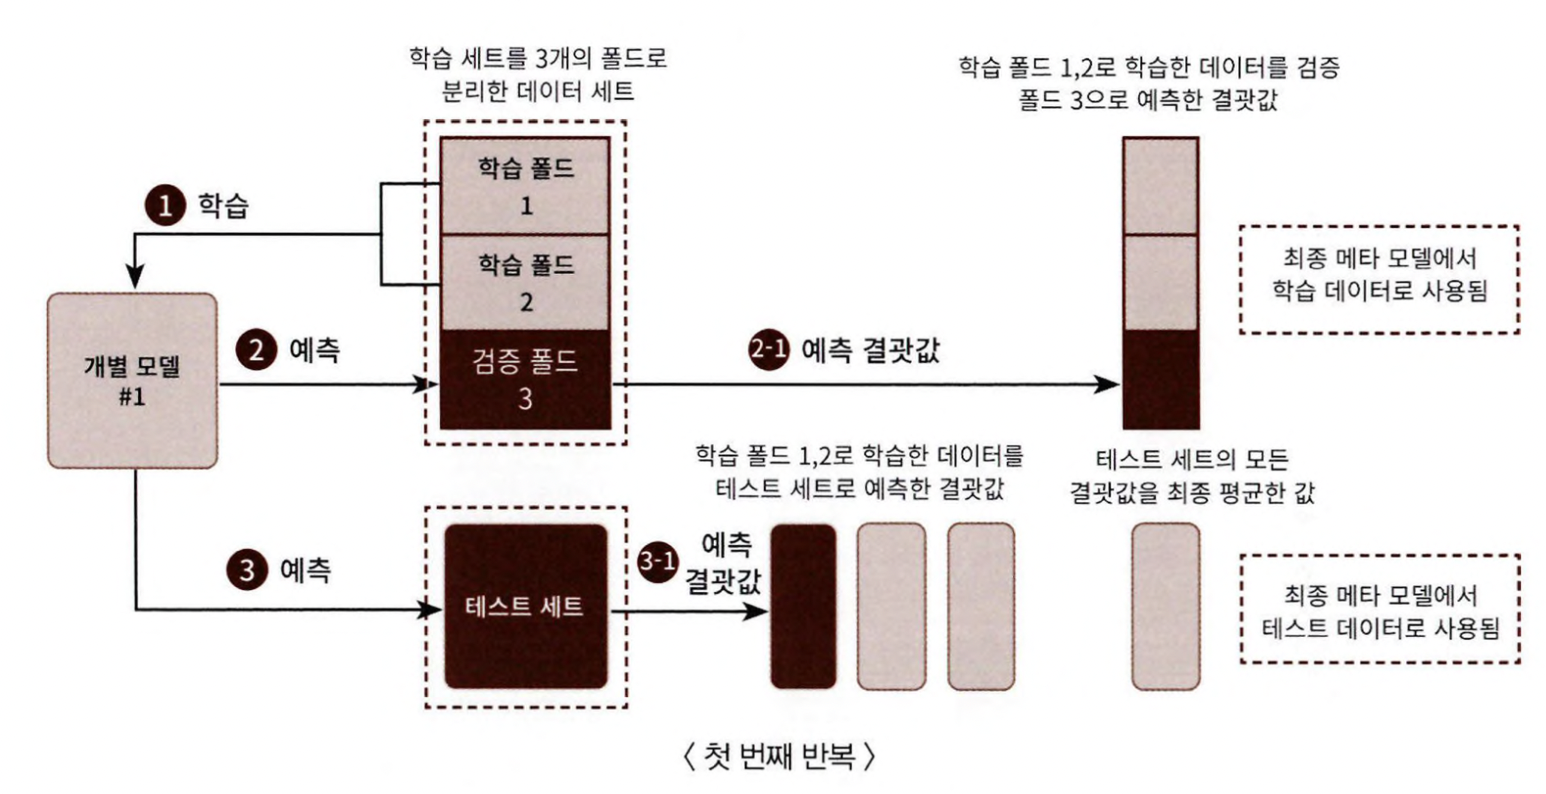

cv = 3 에 따라 위 과정을 세 번 반복하여 최종 메타 모델에서 학습 데이터로 사용될 데이터 세크 형성

스탭 2.

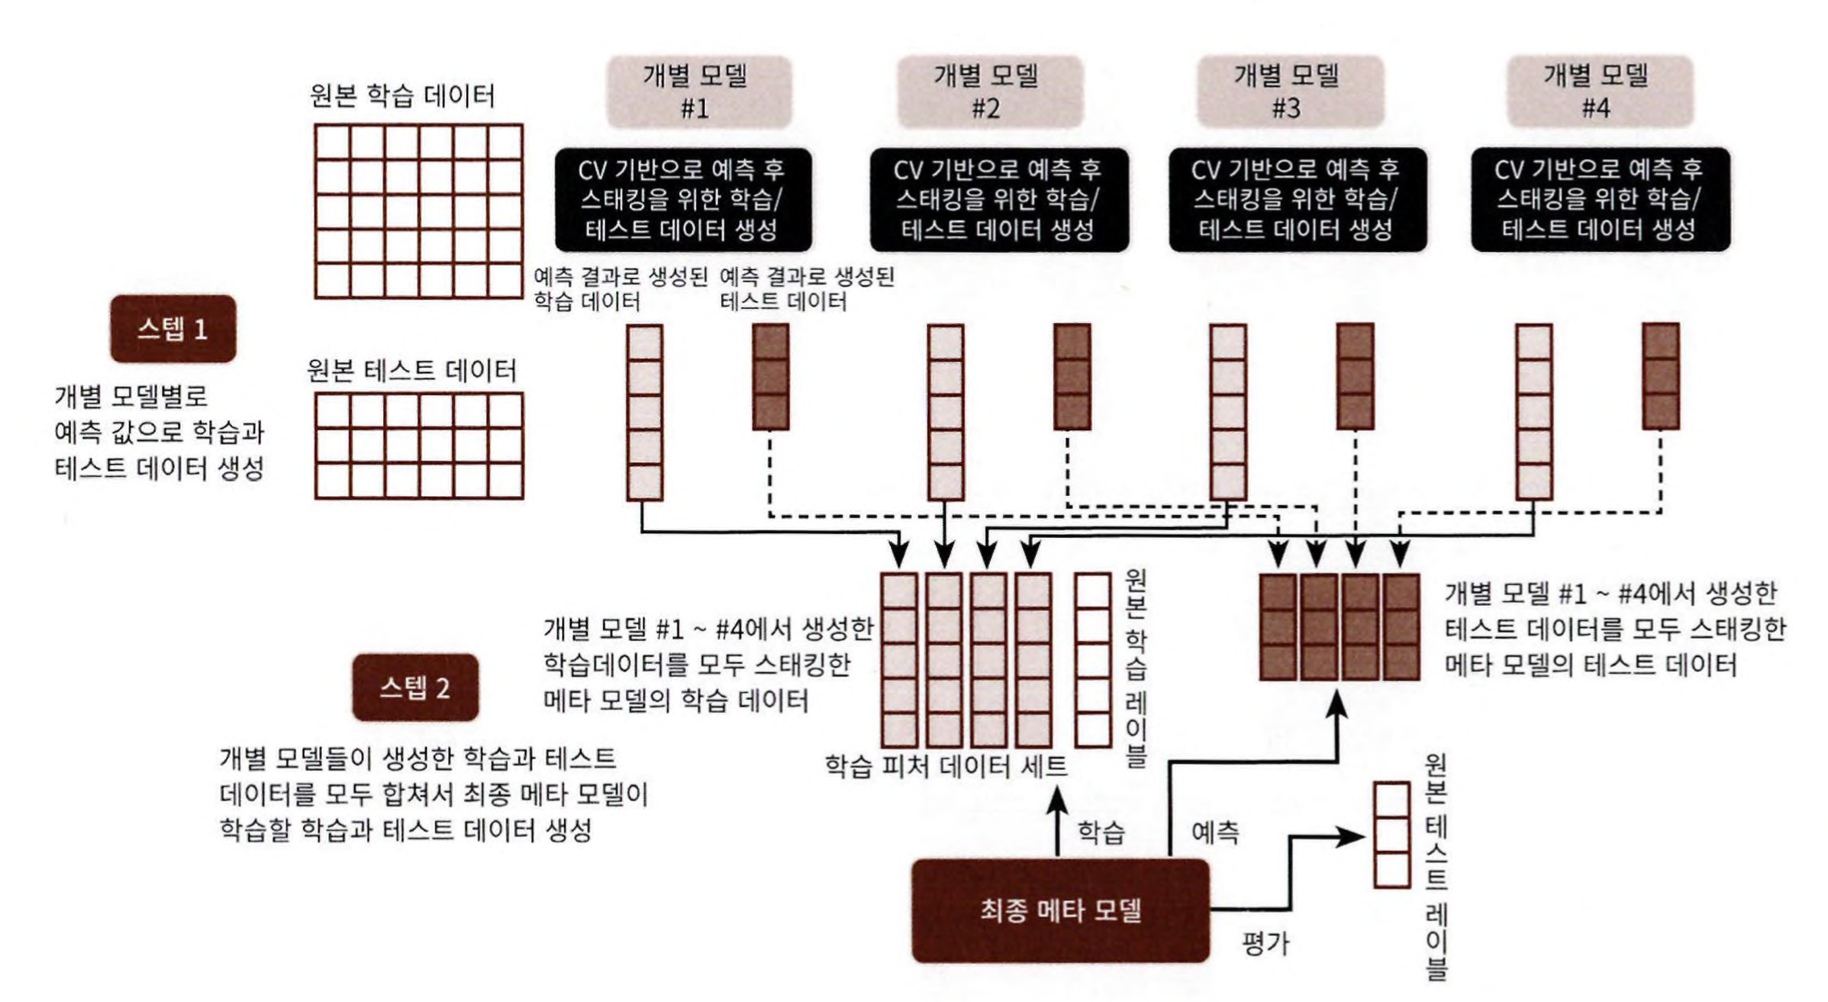

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [35]:
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits = n_folds, shuffle = True)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros([X_train_n.shape[0],1])
    test_pred = np.zeros([X_test_n.shape[0],n_folds])
    print(model.__class__.__name__,'model 시작')

    for folder_counter, (train_index,valid_index) in enumerate(kf.split(X_train_n)):
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        model.fit(X_tr,y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
    test_pred_mean = np.mean(test_pred,axis = 1).reshape(-1,1)
    return train_fold_pred, test_pred_mean

In [36]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf,X_train,y_train,X_test,7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf,X_train,y_train,X_test,7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf,X_train,y_train,X_test,7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf,X_train,y_train,X_test,7)

KNeighborsClassifier model 시작
RandomForestClassifier model 시작
DecisionTreeClassifier model 시작
AdaBoostClassifier model 시작


/Users/kileylee/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kileylee/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kileylee/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/kileylee/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

In [37]:
Stack_final_X_train = np.concatenate((knn_train,rf_train,dt_train,ada_train),axis = 1)
Stack_final_X_test = np.concatenate((knn_test,rf_test,dt_test,ada_test),axis = 1)

print('원본 학습 피처 데이터 Shape:',X_train.shape,'원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,'스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [38]:
lr_final.fit(Stack_final_X_train,y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도:{0:.4f}'.format(accuracy_score(y_test,stack_final)))

최종 메타 모델의 예측 정확도:0.9737
